In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [2]:
df = pd.read_csv('archive/TWO_CENTURIES_OF_UM_RACES.csv')

df.head()

/var/folders/sr/nz5_1_hn7yv_fnd0skdykh9m0000gn/T/ipykernel_58523/2397623457.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('archive/TWO_CENTURIES_OF_UM_RACES.csv')


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [3]:
df.shape


(7461195, 13)

In [4]:
df.dtypes


Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

# clean up
- only want "USA" races,
- 50km and 50mi races

In [5]:
# this allows us see all the possible numbers starting with 50
filt = df['Event distance/length'].str.startswith('50', na=False)
df[filt]['Event distance/length'].value_counts()

Event distance/length
50km                1522609
50mi                 352181
50.3km                 3021
50.4km                 2189
50.1km                 1896
50.5km                 1781
50.7km                 1030
500km                   839
50h                     735
50.2km                  675
50.8km                  640
50.9km                  585
50.6km                  451
50.4mi                  297
50km                    263
50.0km                  204
50.5mi                  198
50.9mi                  165
50.74km                 164
50.6mi                  139
50miles                 130
50Km                    124
50.69km                  86
503km                    70
50Miles                  68
50.8mi                   61
50K                      52
50.9 mi                  51
50mi+                    34
50Mile                   32
50.7mi                   26
503km/7Etappen           25
500km/8Etappen           23
5036km/64Etappen         21
500km/7Etappen           1

In [6]:
pattern = r'^(50(\.0)?(km|mi|mile|miles|k|K))$'
# Apply the filter: Case-insensitive matching
filt = df['Event distance/length'].str.contains(pattern, case=False, regex=True, na=False)
df = df[filt]
df['Event distance/length'].unique(), len(df[filt])


/var/folders/sr/nz5_1_hn7yv_fnd0skdykh9m0000gn/T/ipykernel_58523/2706425226.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filt = df['Event distance/length'].str.contains(pattern, case=False, regex=True, na=False)
/var/folders/sr/nz5_1_hn7yv_fnd0skdykh9m0000gn/T/ipykernel_58523/2706425226.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['Event distance/length'].unique(), len(df[filt])


(array(['50km', '50mi', '50K', '50Km', '50.0km', '50Mile', '50Miles',
        '50miles'], dtype=object),
 1875400)

In [7]:
# make all kilometers to a consistent km format and miles to mi
def standardize_distance(distance):
    distance = re.sub(r'(\d+)\.0*(km|k)', r'\1km', distance, flags=re.IGNORECASE)
    distance = re.sub(r'(\d+)\.0*(mi|miles|mile|m)', r'\1mi', distance, flags=re.IGNORECASE)
    return distance

# standardize_distance('50.0km'), standardize_distance('50.0mi')

df['Event distance/length'] = df['Event distance/length'].apply(standardize_distance)


In [8]:
year_filt = df["Year of event"] == 2020
country_filt = df["Event name"].str.contains(r'\(USA\)')
f_df = df[filt & year_filt & country_filt]

/var/folders/sr/nz5_1_hn7yv_fnd0skdykh9m0000gn/T/ipykernel_58523/2086952054.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f_df = df[filt & year_filt & country_filt]


In [9]:
# remove (USA) from Event name
f_df.loc[:, 'Event name'] = f_df['Event name'].str.split('(').str.get(0).str.strip()
# f_df['Event name'] = f_df['Event name'].str.replace(r'\s*\(.*\)', '', regex=True).str.strip()

In [10]:
# remove h from Athlete performance
f_df['Athlete performance'] = f_df['Athlete performance'].str.replace('h', '').str.strip()

/var/folders/sr/nz5_1_hn7yv_fnd0skdykh9m0000gn/T/ipykernel_58523/2228023030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df['Athlete performance'] = f_df['Athlete performance'].str.replace('h', '').str.strip()


In [11]:
# clean up athlete age
f_df.loc[:, 'athlete_age'] = 2020 - f_df['Athlete year of birth']
f_df.reset_index().head()

/var/folders/sr/nz5_1_hn7yv_fnd0skdykh9m0000gn/T/ipykernel_58523/2370187153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df.loc[:, 'athlete_age'] = 2020 - f_df['Athlete year of birth']


,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
0,2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
1,2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2,2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
3,2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
4,2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [12]:
f_df['athlete_age'].unique()

array([29., 39., 21., 37., 43., 35., 59., 50., 45., 41., 23., 55., 25.,
       52., 58., 46., 44., 61., 60., 54., 27., 47., 51., 42., 34., 31.,
       48., 56., 62., 57., 38., 49., 53., 64., 26., 65., 30., 67., 68.,
       66., 19., 75., 33., 32., 36., 22., 40., 20., 74., 24., 28., 63.,
       73., 69., 72., 85., nan, 76., 77., 18., 70., 16., 71., 17., 81.,
       80., 79., 15., 12., 14., 82., 13., 78.,  9.])

In [13]:
# drop columns: Athlete Club, Athlete Country, Athlete year of birth, Athlete Age Category
cols_to_drop = ['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category']
f_df.drop(columns=cols_to_drop, inplace=True)
# f_df.head()

/var/folders/sr/nz5_1_hn7yv_fnd0skdykh9m0000gn/T/ipykernel_58523/3929504403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df.drop(columns=cols_to_drop, inplace=True)


## clean up null values

In [14]:
f_df.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
athlete_age                  235
dtype: int64

In [15]:
filt = f_df['athlete_age'].isna()==1
f_df[filt]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,F,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,M,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,7.579,398583,NaN


In [16]:
f_df.dropna(inplace=True)
f_df.isna().sum()

/var/folders/sr/nz5_1_hn7yv_fnd0skdykh9m0000gn/T/ipykernel_58523/1547336145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df.dropna(inplace=True)


Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
athlete_age                  0
dtype: int64

In [17]:
# check for duplicates
f_df.duplicated().sum()
# f_df.drop_duplicates(inplace=True)
# f_df.duplicated().sum()

np.int64(0)

In [18]:
# fix types
f_df.loc[:, 'athlete_age'] = f_df['athlete_age'].astype(int)

In [19]:
f_df["Athlete average speed"] = f_df["Athlete average speed"].astype(float) 

/var/folders/sr/nz5_1_hn7yv_fnd0skdykh9m0000gn/T/ipykernel_58523/1158458192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df["Athlete average speed"] = f_df["Athlete average speed"].astype(float)


In [20]:
f_df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [21]:
# rename columns
f_df.rename(columns={
    'Year of event': 'year',
    'Event dates': 'date',
    'Event name': 'event_name',
    'Event distance/length': 'distance',
    'Event number of finishers': 'number_of_finishers',
    'Athlete performance': 'performance',
    'Athlete gender': 'gender',
    'Athlete average speed': 'average_speed',
    'Athlete ID': 'athlete_id',
    'athlete_age': 'athlete_age'
}, inplace=True)
f_df.head()

/var/folders/sr/nz5_1_hn7yv_fnd0skdykh9m0000gn/T/ipykernel_58523/465528090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df.rename(columns={


,year,date,event_name,distance,number_of_finishers,performance,gender,average_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [22]:
# reorder columns
cols = ['year', 'date', 'event_name', 'distance', 'number_of_finishers', 'athlete_id', 'gender', 'athlete_age', 'performance', 'average_speed']

f_df = f_df[cols]
f_df.head(30)
# f_df.to_csv('cleaned_data.csv', index=False)

,year,date,event_name,distance,number_of_finishers,athlete_id,gender,athlete_age,performance,average_speed
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29.0,3:17:55,15.158
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39.0,4:02:32,12.369
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21.0,4:07:57,12.099
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37.0,4:22:02,11.449
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43.0,4:27:34,11.212
2539950,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810282,F,35.0,4:42:06,10.635
2539951,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,11739,M,59.0,4:49:20,10.369
2539952,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,80394,M,50.0,4:49:50,10.351
2539953,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,140909,F,45.0,4:51:00,10.309
2539954,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,753889,M,41.0,5:02:35,9.915


In [23]:
# get date format for dd.mm.yyyy
pd.to_datetime(f_df['date'], format= '%d.%m.%Y')

ValueError: time data "18.-19.01.2020" doesn't match format "%d.%m.%Y", at position 6. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

From the **error**, we can see that not all dates are in the format `dd.mm.yyyy`. So the next step is to see the other unique formats that are in the date column, and see if we can extract the date in the format `dd.mm.yyyy` from them.

In [ ]:
# Define a regex pattern for the expected date format
pattern = r'^\d{2}\.\d{2}\.\d{4}$'

# Identify dates that do not match the pattern
non_matching_dates = f_df[~f_df['date'].str.match(pattern, na=False)]
non_matching_dates['date'].unique()


array(['18.-19.01.2020', '27.-28.06.2020', '06.-07.06.2020',
       '29.02.-01.03.2020', '15.-16.02.2020', '08.-09.02.2020',
       '26.-27.09.2020', '20.-21.09.2020', '19.-20.09.2020',
       '13.-14.09.2020', '12.-13.09.2020', '05.-07.09.2020',
       '05.-06.09.2020', '22.-23.08.2020', '15.-16.08.2020',
       '08.-09.08.2020', '26.-27.12.2020', '05.-06.12.2020',
       '04.-06.12.2020', '28.-29.11.2020', '14.-15.11.2020',
       '07.-08.11.2020', '24.-26.10.2020', '24.-25.10.2020',
       '17.-18.10.2020', '10.-11.10.2020'], dtype=object)

Most of the non-matching dates are in the format `dd.-dd.mm.yyyy`, which could mean that the event was held over multiple days. To simplify it, we just take the start date to be the date of the event, so as to make the format consistent. 
- There's also a case of `dd.mm.-dd.mm.yyyy`, which could mean that the event extended into the next month. We will define a function to extract the first date in the format `dd.mm.yyyy` from the other formats.

In [ ]:
def extract_first_date(date_str):
    # Match the first date in the format dd.mm.yyyy or dd.mm.-dd.mm.yyyy
    match = re.match(r'^(\d{2})\.(\d{2})\.-?\d{2}\.\d{2}\.(\d{4})', date_str)  # Matches the complex range format
    if match:
        # Reconstruct the date using the captured day, month, and year
        return f"{match.group(1)}.{match.group(2)}.{match.group(3)}"
    
    match = re.match(r'^(\d{2})\.-?\d{2}\.(\d{2}\.\d{4})', date_str)
    if match:
        # Reconstruct the date using the captured day and year, and the month from the second part
        return f"{match.group(1)}.{match.group(2)}"
    return date_str # Return the original if no match is found

# testing the function
extract_first_date('12.12.2024'), extract_first_date('26.-27.12.2020'), extract_first_date('29.02.-01.03.2020')

non_matching_dates['date'] = non_matching_dates['date'].apply(extract_first_date)
non_matching_dates['date'].unique()

/var/folders/sr/nz5_1_hn7yv_fnd0skdykh9m0000gn/T/ipykernel_72687/4261956283.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_matching_dates['date'] = non_matching_dates['date'].apply(extract_first_date)


array(['18.01.2020', '27.06.2020', '06.06.2020', '29.02.2020',
       '15.02.2020', '08.02.2020', '26.09.2020', '20.09.2020',
       '19.09.2020', '13.09.2020', '12.09.2020', '05.09.2020',
       '22.08.2020', '15.08.2020', '08.08.2020', '26.12.2020',
       '05.12.2020', '04.12.2020', '28.11.2020', '14.11.2020',
       '07.11.2020', '24.10.2020', '17.10.2020', '10.10.2020'],
      dtype=object)

In [ ]:
# now apply the function to the dataframe
f_df['date'] = f_df['date'].apply(extract_first_date)
f_df['date'] = pd.to_datetime(f_df['date'], format= '%d.%m.%Y')
f_df.head()

,year,date,event_name,distance,number_of_finishers,athlete_id,gender,athlete_age,performance,average_speed
2539945,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29.0,3:17:55,15.158
2539946,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39.0,4:02:32,12.369
2539947,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21.0,4:07:57,12.099
2539948,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37.0,4:22:02,11.449
2539949,2020,2020-02-02,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43.0,4:27:34,11.212


## find races in 2020 - Sarasota | Everglades 
- Our client's performance time is 9:19:10

In [ ]:
filt = f_df['event_name'].str.contains(r'Everglades', case=False, na=False)
f_df[filt]['event_name'].unique()


array(['Everglades 50 km Ultra Run', 'Everglades 50 Mile Ultra Run'],
      dtype=object)

In [ ]:
filt = (f_df['event_name'] == 'Everglades 50 Mile Ultra Run') & (f_df['performance'] == '9:19:10')
f_df[filt]


,year,date,event_name,distance,number_of_finishers,athlete_id,gender,athlete_age,performance,average_speed
2591482,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,222509,M,3.0,9:19:10,8.634


Client Athlete id: 222509

In [ ]:
f_df[f_df['athlete_id'] == 222509]

,year,date,event_name,distance,number_of_finishers,athlete_id,gender,athlete_age,performance,average_speed
2591482,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,222509,M,3.0,9:19:10,8.634
2616900,2020,22.02.2020,Manasota Track Club 50K,50km,36,222509,M,3.0,4:49:16,10.371


# Data visualization & analysis

<Axes: xlabel='distance', ylabel='Count'>

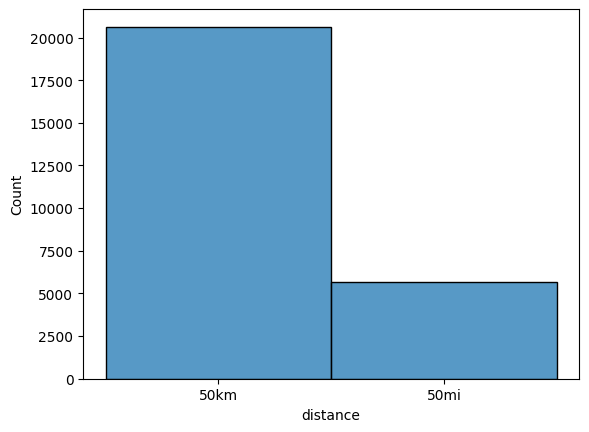

In [ ]:
sns.histplot(f_df['distance'])

<Axes: xlabel='distance', ylabel='Count'>

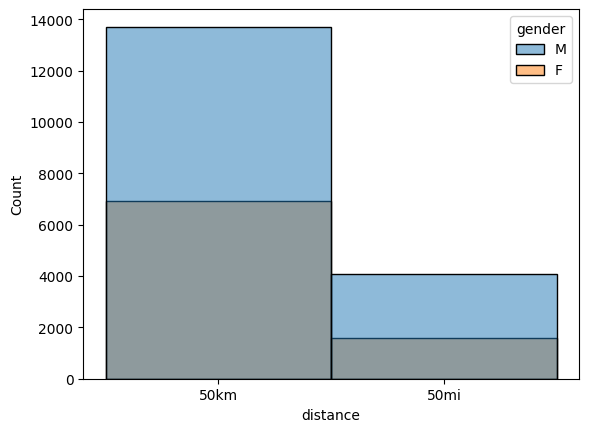

In [ ]:
# add a hue for gender
sns.histplot(f_df, x='distance', hue='gender')

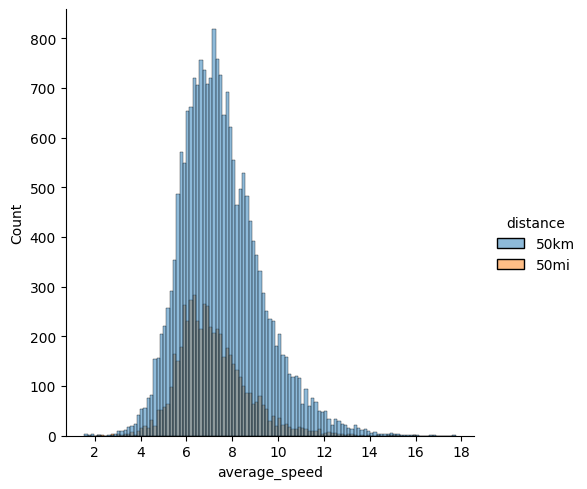

In [ ]:
# speed distribution
sns.displot(f_df, x='average_speed', hue='distance')

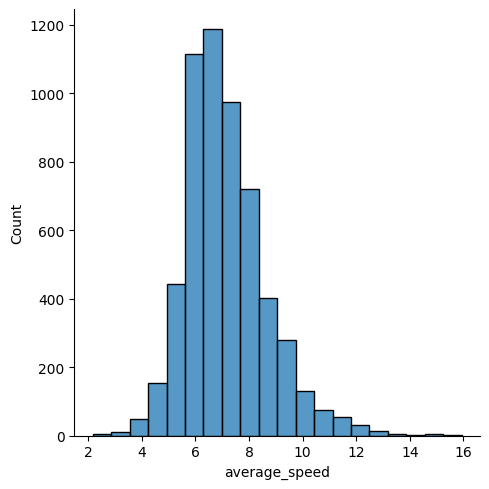

In [ ]:
# speed distribution for 50mi
filt = f_df['distance'] == '50mi'
sns.displot(f_df[filt], x='average_speed', bins=20)

In [ ]:
filt = f_df['distance'] == '50mi'
df_50mi = f_df[filt]
df_50mi['average_speed'].agg(['mean', 'std', 'median'])
df_50mi['average_speed'].describe()

count    5657.000000
mean        7.132664
std         1.514802
min         2.170000
25%         6.111000
50%         6.910000
75%         7.920000
max        15.930000
Name: average_speed, dtype: float64

<Axes: xlabel='distance', ylabel='average_speed'>

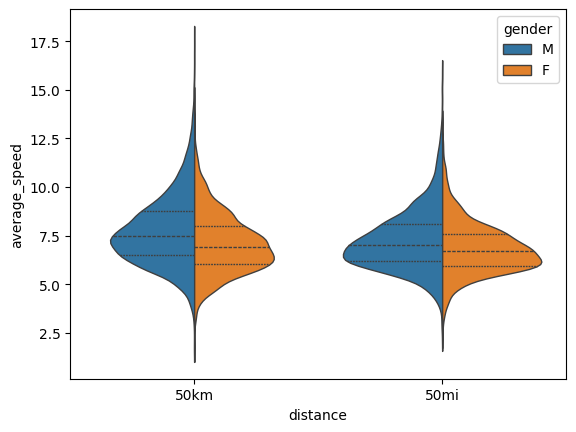

In [ ]:
sns.violinplot(f_df, x='distance', y='average_speed', hue='gender', split=True, inner='quartile', linewidth=1)

over longer races like 50mi, females and males have very similar speeds compare to shorter races.

**Difference in speed between males and females for the 50km, 50mi races ?**

In [ ]:
f_df.groupby(['distance', 'gender'])['average_speed'].agg(['mean', 'std', 'median'])

mean       std  median
distance gender                            
50km     F       7.092015  1.548083  6.9270
         M       7.743376  1.806635  7.5080
50mi     F       6.830764  1.317877  6.6940
         M       7.249766  1.569202  7.0045

In [ ]:
# what age group has the fastest average speed for the 50mi race? (20+ persons count in the age group)
def analyze_speed_by_age(f_df, distance, count_threshold=20, ascending=False):
    filt = f_df['distance'] == distance
    grouped_df = f_df[filt].groupby('athlete_age')['average_speed'].agg(['mean', 'count'])
    # note df[filt] is same as f_df.query('distance == "50mi"')
    result = grouped_df.sort_values(by='mean', ascending=ascending).query('count > @count_threshold')
    return result

analyze_speed_by_age(f_df, '50mi', 20).head(10)

,mean,count
athlete_age,,
29.0,7.895574,136
23.0,7.779800,55
28.0,7.575252,107
30.0,7.569204,157
25.0,7.471053,95
31.0,7.440842,139
38.0,7.420884,232
35.0,7.414633,196
36.0,7.394645,186


In [ ]:
f_df.head()

,year,date,event_name,distance,number_of_finishers,athlete_id,gender,athlete_age,performance,average_speed
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29.0,3:17:55,15.158
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39.0,4:02:32,12.369
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21.0,4:07:57,12.099
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37.0,4:22:02,11.449
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43.0,4:27:34,11.212


In [ ]:
f_df['month'] = f_df['date'].dt.month
season_map = {1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer', 7: 'summer', 8: 'summer', 9: 'fall', 10: 'fall', 11: 'fall', 12: 'winter'}
f_df['season'] = f_df['month'].map(season_map)



array(['winter', 'summer', 'spring', 'fall'], dtype=object)

Text(0.5, 1.0, 'Average Speed by Season for 50mi Races')

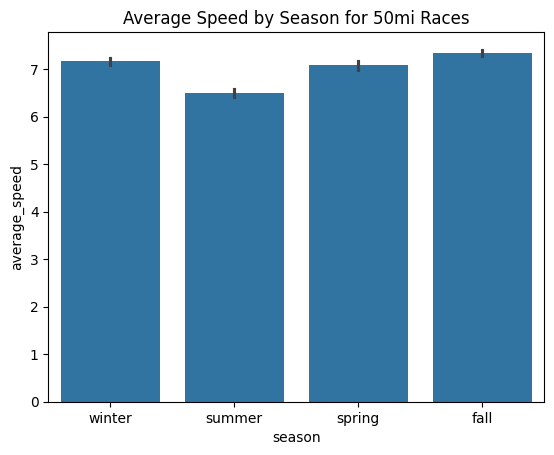

In [ ]:
ax = sns.barplot(f_df.query('distance == "50mi"'), x='season', y='average_speed')
ax.set_title('Average Speed by Season for 50mi Races')

In [ ]:
f_df.query('distance == "50mi"').groupby('season')['average_speed'].agg(['mean', 'std', 'median']).sort_values(by='mean', ascending=False)

,mean,std,median
season,,,
fall,7.351008,1.588735,7.1090
winter,7.167611,1.447792,6.9760
spring,7.082557,1.432403,6.7865
summer,6.504494,1.304935,6.2490


Insight: 
- The fastest average speed for the 50mi race is in the fall season. Foowed by winter, spring and summer. Summer could be due to the heat and humidity. Note this is considering cases in the USA where winter is not as cold in other parts of the world.
- It'll be interesting to see if the same pattern holds for other countries.

In [24]:
import os

# Define the file path
file_path = os.path.join('cleaned', 'cleaned_data_usa.csv')

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the DataFrame to a CSV file
f_df.to_csv(file_path, index=False)